# Gradient Boosting Algorithm

Gradient Boosting is an ensemble learning technique that combines the predictions of several base estimators (typically decision trees) to improve the overall predictive performance. The most popular implementation of gradient boosting is the Gradient Boosting Machine (GBM). Here are the general steps involved in the Gradient Boosting algorithm:

1. **Initialize the model:**
   - Set the initial model as a simple prediction, often the mean of the target variable for regression problems or a class distribution for classification problems.

2. **Calculate the residual errors:**
   - For each data point, calculate the difference between the actual target value and the prediction from the current model. These differences are called residuals.

3. **Fit a weak learner (base model) to the residuals:**
   - Train a weak learner (usually a decision tree with a small depth) on the dataset. The goal is to fit the model to the residuals, capturing the patterns that the current model is not able to predict accurately.

4. **Compute the learning rate multiplied by the predictions of the weak learner:**
   - Multiply the predictions of the weak learner by a small learning rate (a hyperparameter between 0 and 1) to control the contribution of each weak learner to the overall model.

5. **Update the model by adding the scaled predictions to the current model:**
   - Update the current model by adding the scaled predictions obtained in the previous step. This step is where the "gradient" in gradient boosting comes into play, as it minimizes the loss function (e.g., mean squared error for regression) by moving in the direction of the negative gradient.

6. **Repeat steps 2-5 for a specified number of iterations or until a convergence criterion is met:**
   - Iteratively repeat the process of calculating residuals, fitting a weak learner to the residuals, scaling the predictions, and updating the model. The number of iterations is a hyperparameter that you can tune based on model performance.

7. **Make predictions:**
   - Once the specified number of iterations is reached or the convergence criterion is satisfied, the final model is used to make predictions on new, unseen data.

8. **Adjust for overfitting:**
   - Gradient Boosting can be prone to overfitting, especially if the number of iterations is too high. Regularization techniques, such as limiting the tree depth or using shrinkage (reducing the contribution of each weak learner), can be applied to mitigate overfitting.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating a synthetic dataset 
# Set the starting point for random numbers so that we get the same random numbers each time.
np.random.seed(42)

# Generate an array X with shape (100, 1) containing random numbers between -0.5 and 0.5.
X = np.random.rand(100, 1) - 0.5

# Generate the target variable y using a quadratic relationship with added random noise.
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)


X[:, 0]: This extracts all the values from the first column of the array X. In simpler terms, it's taking all the numbers in the list X.

X[:, 0]**2: This squares each of the numbers obtained from the first column of X.

3 * X[:, 0]**2: This multiplies each squared number by 3.

np.random.randn(100): This generates an array of 100 random numbers from a standard normal distribution (mean 0, standard deviation 1).

0.05 * np.random.randn(100): This scales the random numbers by 0.05, introducing a small amount of randomness.

3*X[:, 0]**2 + 0.05 * np.random.randn(100): This combines the squared and scaled numbers from steps 3 and 5, element-wise. So, for each element in the array resulting from step 3, it adds the corresponding element from the array resulting from step 5.

In [3]:
import pandas as pd

In [4]:
#Creating a DataFrame of above generate data
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs y scatter plot')

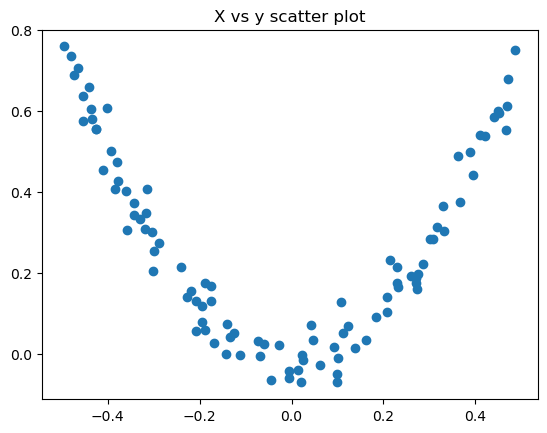

In [7]:
# Visualize the data with scatter plot.
plt.scatter(df['X'],df['y'])
plt.title('X vs y scatter plot')

In [8]:
# Step 1 - Initialize the first prediction as the mean of y
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [10]:
# Step 2 - Calculate the residuals (difference between y and the initial prediction).
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


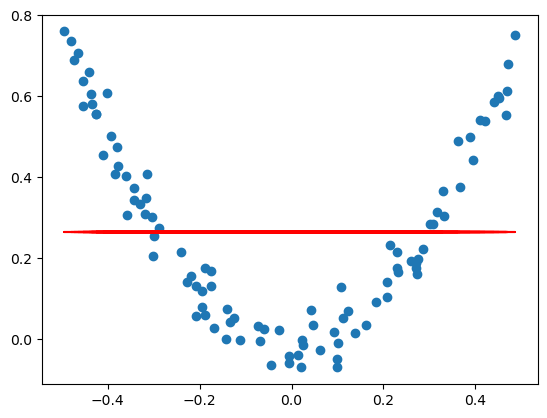

In [12]:
# Visualize the initial prediction.
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) #the max_leaf_nodes can be between 8(for small dataset) and 32(for large dataset)

In [15]:
# Step 3-5: Fit a weak learner(first decision tree) to the residuals and update the model
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

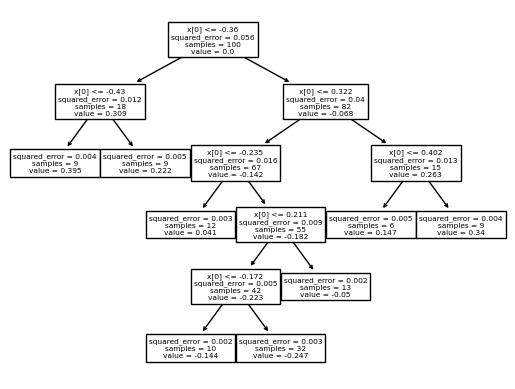

In [16]:
# Visualize the first decision tree.
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [17]:
# Generate X_test for visualization and predict using the first tree.
X_test = np.linspace(-0.5, 0.5, 500)


In [18]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

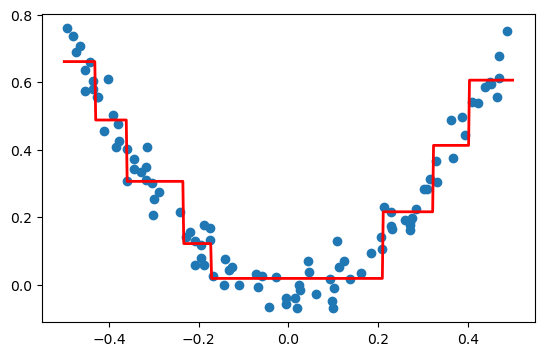

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [20]:
# Update the prediction with the first tree.
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [21]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [22]:
# Calculate the residuals for the updated prediction.
df['res2'] = df['y'] - df['pred2']

In [23]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [24]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
# Fit the second decision tree to the residuals.
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

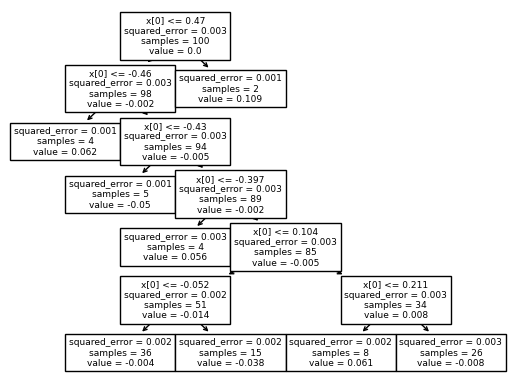

In [26]:
# Visualize the second decision tree.
plot_tree(tree2)
plt.show()

In [27]:
# Generate predictions using both trees.
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

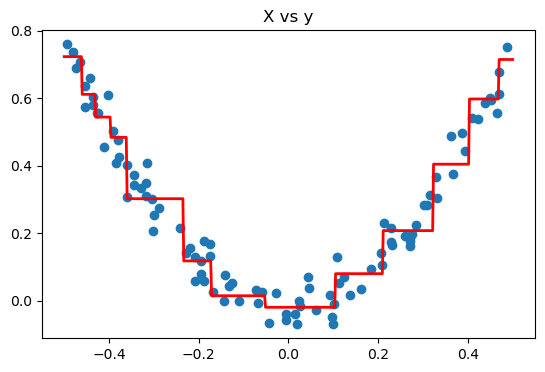

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [29]:
# Define a function for gradient boosting.
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


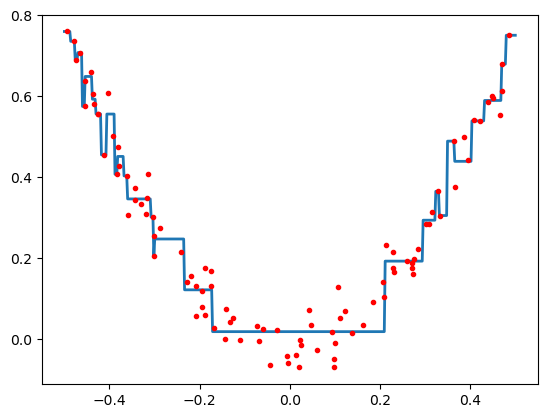

4


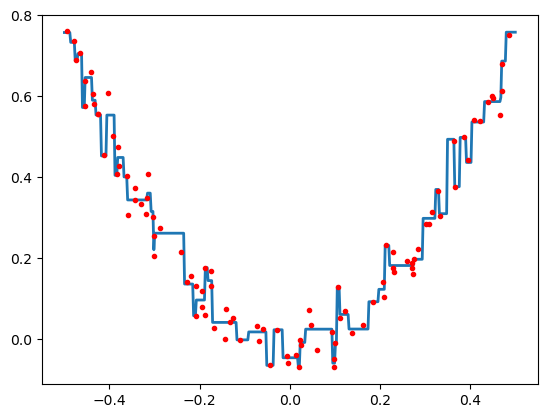

3


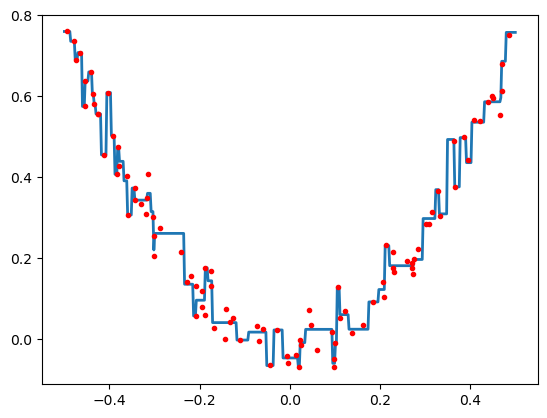

2


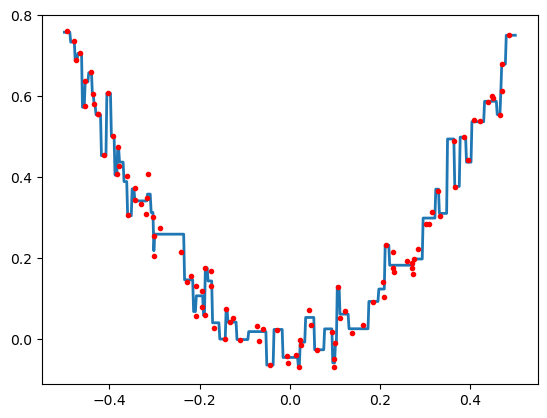

1


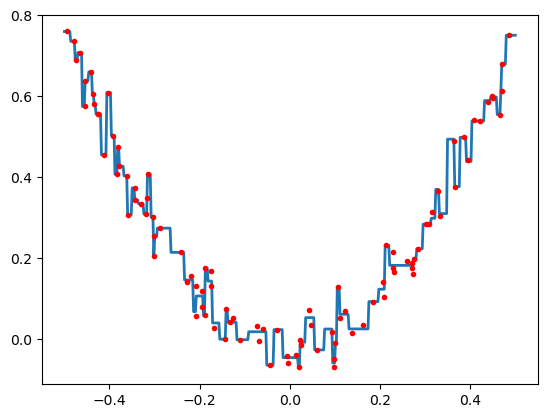

In [30]:
# Run the gradient boosting function with 5 iterations and learning rate lr=1.
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)